# Find the accuracy, mse, mae using decision tree, KNN & Logistic regression  algorithm. Create a dataframe & make a barplot using these values.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('shoe.xlsx')

In [3]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


# Logistic Regression

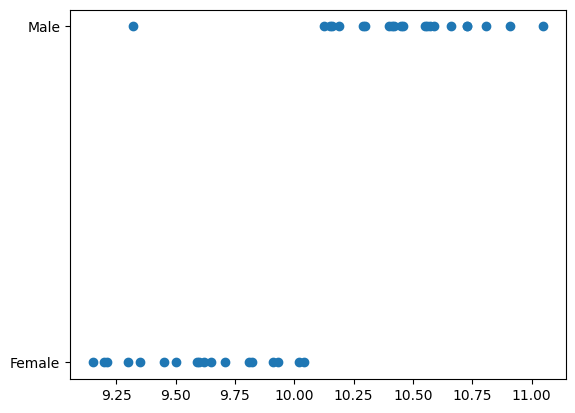

In [4]:
plt.scatter(df['size(cm)'],df['class(y)'])

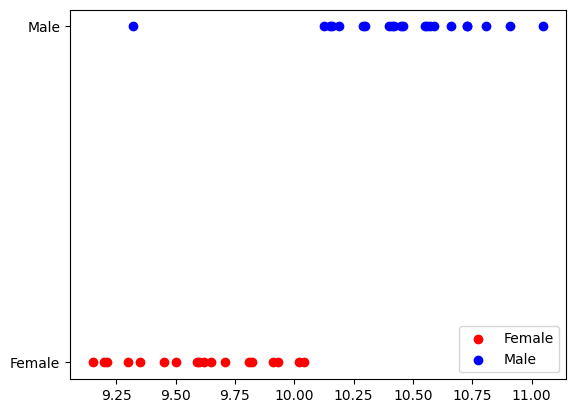

In [5]:

df0 = df[df['class(y)']=='Female']
df1 =df[df['class(y)']=='Male']
plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='Male')
plt.legend()

# Preprocessing

In [6]:
df['class(y)'] = df['class(y)'].replace(['Male','Female'],[1,0])

In [7]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [8]:
x = df.drop('class(y)',axis=1)
y = df[['class(y)']]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =  train_test_split(x,y,test_size=0.3,random_state=5)

In [9]:
xtrain.head()

,size(cm)
2,10.41
34,10.16
38,9.60
25,10.46
19,10.59


In [10]:
ytrain.head()

,class(y)
2,1
34,1
38,0
25,1
19,1


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
reg = LogisticRegression()

In [13]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [14]:
m = reg.coef_

In [15]:
m

array([[2.44001258]])

In [16]:
c = reg.intercept_
c

array([-24.4101648])

In [17]:
reg.predict_proba(xtest)  

array([[0.41193719, 0.58806281],
       [0.87675454, 0.12324546],
       [0.71854258, 0.28145742],
       [0.61624526, 0.38375474],
       [0.16793001, 0.83206999],
       [0.79446391, 0.20553609],
       [0.07229397, 0.92770603],
       [0.84147548, 0.15852452],
       [0.25200136, 0.74799864],
       [0.8893432 , 0.1106568 ],
       [0.7738265 , 0.2261735 ],
       [0.3323524 , 0.6676476 ]])

In [18]:
L_pred=reg.predict(xtest)
L_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [19]:
Log_score = reg.score(xtest,ytest)
Log_score

0.9166666666666666

In [20]:
L_mae = mean_absolute_error(ytest,L_pred)

In [21]:
L_mae

0.08333333333333333

In [22]:
L_mse =mean_squared_error(ytest,L_pred)

In [23]:
L_mse

0.08333333333333333

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [25]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [26]:
dt_pred = dt.predict(xtest)

In [27]:
dt_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [28]:
dt_accuracy = dt.score(xtest,ytest)

In [29]:
dt_accuracy

0.9166666666666666

In [30]:
dt_mae = mean_absolute_error(ytest,dt_pred)

In [31]:
dt_mae

0.08333333333333333

In [32]:
dt_mse = mean_squared_error(ytest,dt_pred)

In [33]:
dt_mse

0.08333333333333333

# KNN Clasification

In [34]:
from sklearn.neighbors import KNeighborsClassifier
ne = KNeighborsClassifier(n_neighbors=10)

In [35]:
ne.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [36]:
kn_pred = ne.predict(xtest)

In [37]:
kn_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [38]:
print(classification_report(ytest,kn_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [39]:
kn_accuracy = ne.score(xtest,ytest)

In [40]:
kn_accuracy

0.9166666666666666

In [41]:
kn_mse = mean_squared_error(ytest, kn_pred)

In [42]:
kn_mse

0.08333333333333333

In [43]:
kn_mae = mean_absolute_error(ytest,kn_pred)

In [44]:
kn_mae

0.08333333333333333

# DataFrame

In [45]:
data = {'Models':['Logistics Regression','Decision Tree','KNN Classification'],
       'Accuracy': [Log_score,dt_accuracy,kn_accuracy],
       'MSE': [L_mse,dt_mse,kn_mse],
       'MAE': [L_mae,dt_mae,kn_mae]}
df_after_pred = pd.DataFrame(data=data)
df_after_pred.head()

,Models,Accuracy,MSE,MAE
0,Logistics Regression,0.916667,0.083333,0.083333
1,Decision Tree,0.916667,0.083333,0.083333
2,KNN Classification,0.916667,0.083333,0.083333


# Bar Plot

In [46]:
import seaborn as sns

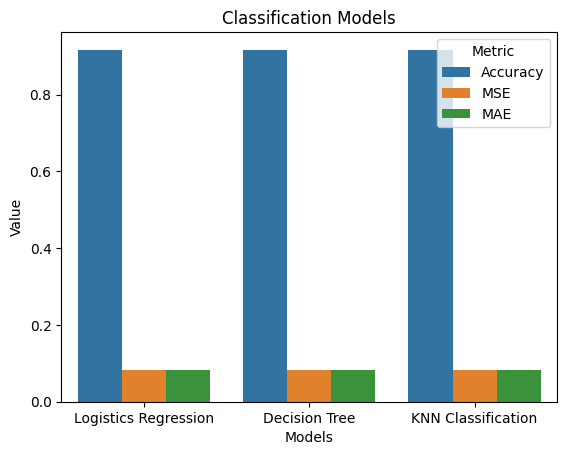

In [47]:
data_bar = df_after_pred.melt('Models', var_name='Metric', value_name='Value')
sns.barplot(x='Models', y='Value', hue='Metric', data=data_bar)
plt.title('Classification Models')
plt.xlabel('Models')
plt.ylabel('Value')
plt.show()